# . steps during data analysis
1. dowload files
2. make dataframes
3. analyzed extreme values
4. Find realtionships, stat, graphs
5. describe story

#Relative humidity and dew point are indeed concerned with the amount of water vapor in the air, but there are differences. Dew point is the temperature at which the air is saturated (100 percent relative humidity). It is dependent on only the amount of moisture in the air. Relative humidity is the percent of saturation at a given temperature; it depends on moisture content and temperature. As air is heated, its ability to hold water vapor doubles with about every 11 degree increase in temperature. If air is at 100 percent relative humidity at 60 degrees but is heated to 93 degrees, its relative humidity decreases to about 33 percent. Its dew point remains at 60 degrees.

In coastal hot climate, it is important to refer to Dew point.

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import numpy as np
from scipy.stats import linregress, stats
from textwrap import wrap
from scipy import optimize

In [2]:
#values are mixed RH and Dew point in excel sheet downloaded from the web

xls = pd.ExcelFile('Resources/CA-daily_RH_2010-2016_Ruby.xlsx', )
RH_2010 = pd.read_excel(xls, '2010', encoding='utf8')
RH_2011 = pd.read_excel(xls, '2011', encoding='utf8')
RH_2012 = pd.read_excel(xls, '2012', encoding='utf8')
RH_2013 = pd.read_excel(xls, '2013', encoding='utf8')
RH_2014 = pd.read_excel(xls, '2014', encoding='utf8')
RH_2015 = pd.read_excel(xls, '2015', encoding='utf8')
RH_2016 = pd.read_excel(xls, '2016', encoding='utf8')
RH_2010.head(10)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
1,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
2,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
3,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
4,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
5,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
6,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
7,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
8,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435
9,6,7,2,62201,1,39.757371,-121.843286,WGS84,Relative Humidity,1 HOUR,...,NaN,20,INSTRUMENTAL - COMPUTED(INDIRECT),Chico-Manzanita Ave.,"468 MANZANITA AVE, CHICO",California,Butte,Not in a city,"Chico, CA",41435


In [3]:
RH_2010.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [4]:
# remove extraneous columns from every df
sheets = [RH_2010, RH_2011,RH_2012, RH_2013, RH_2014, RH_2015, RH_2016]
for df in sheets:
    df.drop(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'City Name',
       'CBSA Name', 'Date of Last Change'], axis=1, inplace=True)
RH_2010.head()

,Date Local,Arithmetic Mean,1st Max Value,1st Max Hour,County Name
0,2010-01-01,73.000000,83.0,3,Butte
1,2010-01-02,81.250000,90.0,6,Butte
2,2010-01-03,83.666667,92.0,8,Butte
3,2010-01-04,91.000000,94.0,3,Butte
4,2010-01-05,89.750000,94.0,10,Butte


In [5]:
for df in sheets:
    df['Date Local'] = pd.to_datetime(df['Date Local'], format='%Y-%m-%d')
    df['Year'] = pd.DatetimeIndex(df['Date Local']).year

In [7]:
RH_2015.head()

,Date Local,Arithmetic Mean,1st Max Value,1st Max Hour,County Name,Year
0,2015-08-01,42.700000,65.8,5,Amador,2015
1,2015-08-02,50.308333,70.6,23,Amador,2015
2,2015-08-03,56.158333,86.1,4,Amador,2015
3,2015-08-04,61.133333,79.1,4,Amador,2015
4,2015-08-05,53.812500,91.5,4,Amador,2015


In [8]:
all_RH = pd.concat(sheets, sort=False)
all_RH.head()

,Date Local,Arithmetic Mean,1st Max Value,1st Max Hour,County Name,Year
0,2010-01-01,73.000000,83.0,3,Butte,2010
1,2010-01-02,81.250000,90.0,6,Butte,2010
2,2010-01-03,83.666667,92.0,8,Butte,2010
3,2010-01-04,91.000000,94.0,3,Butte,2010
4,2010-01-05,89.750000,94.0,10,Butte,2010


In [9]:
#del all_ozone['Unnamed: 16']
all_RH.isnull().sum()

Date Local         0
Arithmetic Mean    0
1st Max Value      0
1st Max Hour       0
County Name        0
Year               0
dtype: int64

In [10]:
#all_ozone_conc.dropna()

In [11]:
all_RH = all_RH[['County Name', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'Year', 'Date Local']]
all_RH = all_RH.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'RH_percent','1st Max Value': 'First_Max_Value', '1st Max Hour':'First_Max_Hour', 'Date Local': 'Date_Local'})
all_RH.head()

,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local
0,Butte,73.000000,83.0,3,2010,2010-01-01
1,Butte,81.250000,90.0,6,2010,2010-01-02
2,Butte,83.666667,92.0,8,2010,2010-01-03
3,Butte,91.000000,94.0,3,2010,2010-01-04
4,Butte,89.750000,94.0,10,2010,2010-01-05


In [12]:
# quert to filter zero valures
all_RH3 =all_RH.query('(RH_percent != 0)&(First_Max_Value != 0) & (First_Max_Hour != 0)')
all_RH3.head()

,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local
0,Butte,73.000000,83.0,3,2010,2010-01-01
1,Butte,81.250000,90.0,6,2010,2010-01-02
2,Butte,83.666667,92.0,8,2010,2010-01-03
3,Butte,91.000000,94.0,3,2010,2010-01-04
4,Butte,89.750000,94.0,10,2010,2010-01-05


In [13]:
Bins=[-20,20,40,60,100]
Group_name=['Extremely_Dry', 'Dry','Moderate','Humid']

In [14]:
#the binning is based on Arithmetic mean named as RH_percent
all_RH3["Moisture_Levels"]=pd.cut(all_RH3["RH_percent"],Bins,labels=Group_name)
all_RH3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local,Moisture_Levels
0,Butte,73.000000,83.0,3,2010,2010-01-01,Humid
1,Butte,81.250000,90.0,6,2010,2010-01-02,Humid
2,Butte,83.666667,92.0,8,2010,2010-01-03,Humid
3,Butte,91.000000,94.0,3,2010,2010-01-04,Humid
4,Butte,89.750000,94.0,10,2010,2010-01-05,Humid


In [15]:
#Save file to output folder as Binned RH_daily
all_RH3.to_csv("Output\Binned_RH_daily_2010_2016.csv" )

In [16]:
from scipy import optimize

In [17]:
#convert DF to array
RH_date=all_RH3["Date_Local"].values
RH_date

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2016-12-29T00:00:00.000000000', '2016-12-30T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
RH_values=all_RH3["RH_percent"].values
RH_values

array([73.      , 81.25    , 83.666667, ..., 80.2     , 81.504167,
       81.220833])

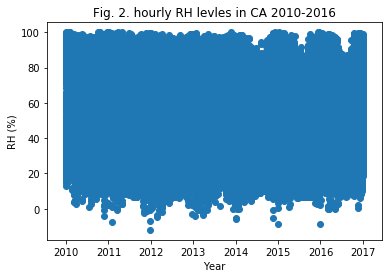

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(RH_date, RH_values)
plt.title("Fig. 2. hourly RH levles in CA 2010-2016")
plt.ylabel("RH (%)")
plt.xlabel("Year")
#plt.grid(linestyle="dashed")
#plt.ylim(-1,130)
#plt.xlim(-90,90)
#plt.xticks(rotation='horizontal')
#plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
# Show plot
plt.show()
plt.savefig('Output/daily_RH_CA_2010_2016.png')

#RH below zero is not possible check with group??

In [20]:
min_RH = all_RH3['RH_percent'].min()
min_county = all_RH3.loc[all_RH3['RH_percent'] == min_RH,:]
min_county

,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local,Moisture_Levels
5511,Inyo,-12.0,-6.0,17,2011,2011-12-23,Extremely_Dry


In [21]:
max_RH = all_RH3['RH_percent'].max()
max_county = all_RH3.loc[all_RH3['RH_percent'] == max_RH,:]
max_county

,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local,Moisture_Levels
4407,Inyo,100.0,100.0,23,2010,2010-02-06,Humid
4693,Inyo,100.0,100.0,15,2010,2010-12-23,Humid


In [25]:
#to extract month from date-local
all_RH3['Month'] = pd.DatetimeIndex(all_RH3['Date_Local']).month
all_RH3.head()

C:\Users\shaheen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,County,RH_percent,First_Max_Value,First_Max_Hour,Year,Date_Local,Moisture_Levels,Month
0,Butte,73.000000,83.0,3,2010,2010-01-01,Humid,1
1,Butte,81.250000,90.0,6,2010,2010-01-02,Humid,1
2,Butte,83.666667,92.0,8,2010,2010-01-03,Humid,1
3,Butte,91.000000,94.0,3,2010,2010-01-04,Humid,1
4,Butte,89.750000,94.0,10,2010,2010-01-05,Humid,1


In [26]:
RH_group1a = pd.DataFrame(all_RH3.groupby([ "Month","Year","County"]).mean()["RH_percent"])
#RH_group1=RH_group1a.unstack(level=0)
RH_group1a.reset_index(inplace=True)
RH_group1a.head()

,Month,Year,County,RH_percent
0,1,2010,Butte,83.383760
1,1,2010,Del Norte,82.722917
2,1,2010,Fresno,84.534420
3,1,2010,Glenn,80.642399
4,1,2010,Imperial,55.950320


In [27]:
#Save file to output folder as monthly mean O3
RH_group1a.to_csv("Output\monthly_mean_RH.csv" )

In [28]:
RH_group1b = pd.DataFrame(all_RH3.groupby([ "Month","Year","County"]).sem()["RH_percent"])
#RH_group1=RH_group1a.unstack(level=0)
RH_group1b.reset_index(inplace=True)
RH_group1b.head()

,Month,Year,County,RH_percent
0,1,2010,Butte,0.965054
1,1,2010,Del Norte,0.896874
2,1,2010,Fresno,0.994165
3,1,2010,Glenn,1.022156
4,1,2010,Imperial,3.050255


In [29]:
#Save file to output folder monthly_sem_RH
RH_group1b.to_csv("Output\monthly_sem_RH.csv" )

In [31]:
Bins=[-20,20,40,60,100]
Group_name=['Extremely_Dry', 'Dry','Moderate','Humid']

In [32]:
RH_group1a["Monthly_RH_Levels"]=pd.cut(RH_group1a["RH_percent"],Bins,labels=Group_name)
RH_group1a

,Month,Year,County,RH_percent,Monthly_RH_Levels
0,1,2010,Butte,83.383760,Humid
1,1,2010,Del Norte,82.722917,Humid
2,1,2010,Fresno,84.534420,Humid
3,1,2010,Glenn,80.642399,Humid
4,1,2010,Imperial,55.950320,Moderate
5,1,2010,Inyo,49.188537,Moderate
6,1,2010,Kern,82.293176,Humid
7,1,2010,Lake,86.507898,Humid
8,1,2010,Los Angeles,58.238107,Moderate
9,1,2010,Madera,83.552469,Humid


In [39]:
#Save file to output folder as monthly mean RH
RH_group1a.to_csv("Output\monthly_mean_RH_binned.csv" )

In [40]:
# Taking mean of all RH for plot with error bar
RH_group1a = pd.DataFrame(all_RH.groupby(['Year', 'County']).mean()).reset_index()
RH_group1a

,Year,County,RH_percent,First_Max_Value,First_Max_Hour
0,2010,Butte,63.226382,80.289498,7.510502
1,2010,Del Norte,78.272041,88.555793,8.634146
2,2010,Fresno,63.759744,86.297398,5.475836
3,2010,Glenn,65.400675,80.378082,8.112329
4,2010,Humboldt,74.468749,88.244966,7.442953
5,2010,Imperial,44.972277,64.742466,7.016438
6,2010,Inyo,33.525156,48.716049,8.729730
7,2010,Kern,58.046732,78.493732,5.841851
8,2010,Lake,71.045335,88.407509,6.826007
9,2010,Los Angeles,66.350355,84.145613,7.074524


In [41]:
# Taking SEM for plot
RH_group1b = pd.DataFrame(all_RH.groupby(['Year', 'County']).sem()).reset_index()
RH_group1b.head()

,Year,County,Date_Local,First_Max_Hour,First_Max_Value,RH_percent
0,2010,Butte,NaN,0.213154,0.506511,0.572056
1,2010,Del Norte,NaN,0.384104,0.188041,0.357337
2,2010,Fresno,NaN,0.164489,0.398643,0.555359
3,2010,Glenn,NaN,0.409363,0.508381,0.739435
4,2010,Humboldt,NaN,0.405144,0.176364,0.575692


In [42]:
df.dtypes

Date Local         datetime64[ns]
Arithmetic Mean           float64
1st Max Value             float64
1st Max Hour                int64
County Name                object
Year                        int64
dtype: object

In [43]:
# To measure Max values
RH_group1c = pd.DataFrame(all_RH.groupby(['Year', 'County']).max()).reset_index()
RH_group1c

,Year,County,RH_percent,First_Max_Value,First_Max_Hour,Date_Local
0,2010,Butte,99.000000,100.0,23,2010-12-31
1,2010,Del Norte,91.445833,93.4,23,2010-12-31
2,2010,Fresno,100.000000,100.0,23,2010-12-31
3,2010,Glenn,91.416667,93.0,23,2010-12-31
4,2010,Humboldt,90.879167,92.0,23,2010-12-31
5,2010,Imperial,91.208333,100.0,23,2010-12-31
6,2010,Inyo,100.000000,100.0,23,2010-12-31
7,2010,Kern,100.000000,100.0,23,2010-12-31
8,2010,Lake,100.000000,100.0,23,2010-12-31
9,2010,Los Angeles,100.000000,100.0,23,2010-12-31


In [ ]:
#group_tot = ozone_group(ozone_group['Ozone (ppb)', year])[County].mean().unstack()#.fillna(0)
#group_tot
#ozone_group_tot = ozone_group.loc[ozone_group["Year"] == int(year), :]
#ozone_group_tot=ozone_group_tot.unstack(level=0)
#ozone_group_tot.head()
#pha_locfiltered = pha3.loc[pha3["NDC"] == 50111043302, :]
#pha_locfiltered.head()


In [ ]:
max_RH = RH_group1c['RH (%)'].max()
max_county = RH_group1c.loc[RH_group1c['RH (%)'] == max_RH,:] 
#max_county = temp_group.loc[temp_group['county', 'Year'].mean () ['Temp (C)',:] 
max_county


In [ ]:
min_temp = temp_group1c['Temp (C)'].min()
min_county = temp_group1c.loc[temp_group1c['Temp (C)'] == min_temp,:] 
min_county

In [ ]:
#sorting for each year based on mean values
temp_group_2011 = temp_group5.loc[temp_group5["Year"] == 2011, :]
#temp2011_mean_df = tempe_group5_2011.unstack(level = 0)
temp_group_2011

In [ ]:
max_ppb = RH_group_2011['Ozone (ppb)'].max()
max_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == max_ppb,:] 
max_county_2011

In [ ]:

min_county_2011 = ozone_group_2011.loc[ozone_group_2011['Ozone (ppb)'] == min_ppb,:] 
min_county_2011

In [ ]:
ozone_group_tot = pd.DataFrame(all_ozone_conc.merge(['Year', 'County']).sem ()['Ozone (ppb)']). reset_index()
ozone_group_tot

In [ ]:
# find the county with the highest ppb
max_ppb = ozone_group['Ozone (ppb)', 'Year'].max()
#max_county2011 = ozone_group.loc[ozone_group['Ozone (ppb)'] == max_ppb,:] & (ozone_group.loc['Year']==2011),:]
#max_county2011

In [ ]:
# find the county with the highest ppb
max_ppb = ozone_group['Ozone (ppb)'].max()
max_county = ozone_group.loc[ozone_group['Ozone (ppb)'] == max_ppb,:]
max_county

In [ ]:
min_ppb = ozone_group['Ozone (ppb)'].min()
min_county = ozone_group.loc[ozone_group['Ozone (ppb)'] == min_ppb,:]
min_county

In [ ]:
counties = ozone_group['County'].unique()
counties

In [ ]:
# ANOVA - Counties (Mean Ozone)
# ANOVA - Counties (Mean Ozone)
ozone_dict = {}
for county in counties:
    if county not in ozone_dict:
        ozone_dict[county] = list([ozone_group['County']==county,:]['Ozone (ppb)'])
        
print("ANOVA analysis comparing ozone concentration between two ounties in California ")
try:
    ozone_compare1 = input("Choose a county: ")
    ozone_compare2 = input("Choose another county: ")
    print(stats.f_oneway(ozone_dict[ozone_compare1], ozone_dict[ozone_compare2]))
    comparison_df = pd.DataFrame(oa_children_df.loc[(oa_children_df['County']==ozone_compare1) | (oa_children_df['County']==ozone_compare2),:])
    comparison_df.boxplot('Ozone (ppb)', by='County')
    plt.ylabel("Average Ozone (ppb) from 2011-2016")
except KeyError: 
    print("Could not find county")
#comparison_df.head()


In [ ]:
# ANOVA - Counties (Raw AQI + Raw Ozone) for chosen year

year = input("Choose a year: ")
ozone_yr = all_ozone.loc[all_ozone['Year']==int(year), :]
o3aqi_dict = {}
for county in counties:
    if county not in o3aqi_dict:
        o3aqi_dict[county] = {}
        o3aqi_dict[county]['Ozone'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['O3_ppb'])
        o3aqi_dict[county]['AQI'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['AQI'])
#print(o3aqi_dict)
        
try:
    parameter = input("Choose a parameter (AQI or Ozone): ")
    compare1 = input("Choose a county: ")
    compare2 = input("Choose another county: ")
    
    print(f"ANOVA analysis comparing {parameter} between {compare1} and {compare2} in California in {year}")

    print(stats.f_oneway(o3aqi_dict[compare1][parameter], o3aqi_dict[compare2][parameter]))
    comparison_df = pd.DataFrame(ozone_yr.loc[(ozone_yr['County Name']==compare1) | (ozone_yr['County Name']==compare2),:])
    if parameter == 'AQI':
        comparison_df.boxplot(parameter, by='County Name')
    if parameter == 'Ozone':
        comparison_df.boxplot('O3_ppb', by='County Name')
    plt.ylabel(f"{parameter} in {year}")
except KeyError: 
    print("Could not find county")

In [ ]:
asthma_df = pd.read_csv('Resources/asthma-ed-visits.csv')
asthma_df.head()

In [ ]:
asthma_df['Geography'].unique()

In [ ]:
# remove 'California' so only specific counties remain
asthma_df = asthma_df.loc[asthma_df['Geography'] != 'California', :]

In [ ]:
asthma_df['Geography'].unique()

In [ ]:
# check where null values exist
asthma_df.isnull().sum()

In [ ]:
race_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'African-American') | (asthma_df['Strata Name'] == 'African-American') | (asthma_df['Strata Name'] == 'White') | (asthma_df['Strata Name'] == 'Hispanic') | (asthma_df['Strata Name'] == 'American Indian/Alaskan Native') | (asthma_df['Strata Name'] == 'Asian/Pacific Islander'), ['Geography', 'Strata Name','Year', 'Rate']]
race_asthma_df = pd.DataFrame(race_asthma.groupby(['Strata Name', 'Year']).mean())
race_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Race")
plt.savefig('Images/asthmabyrace.png')

In [ ]:
age_asthma = asthma_df.loc[(asthma_df['Strata Name'] == 'Under 18') | (asthma_df['Strata Name'] == '18 and Over'), ['Geography', 'Strata Name','Year', 'Rate']]
age_asthma_df = pd.DataFrame(age_asthma.groupby(['Strata Name', 'Year']).mean())
age_asthma_df.unstack(0).plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("ED Visits for Asthma (per 10,000)")
plt.title("Hospital Visits for Asthma by Age")
#plt.savefig('Images/asthmabyage.png')

In [ ]:
asthma_children_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='Under 18'),:]
asthma_children_df = asthma_children_df.rename(columns={'Geography': 'County'})
asthma_children_df.head()

In [ ]:
asthma_adults_df = asthma_df.loc[(asthma_df['Strata'] == 'Total Population') & (asthma_df['Strata Name']=='18 and Over'),:]
asthma_adults_df = asthma_adults_df.rename(columns={'Geography': 'County'})
asthma_adults_df.head()

In [ ]:
asthma_df.loc[asthma_df['Strata Name']=='African-American',:]

In [ ]:
asthma_children_df = asthma_children_df[['Year', 'County', 'Rate']]
asthma_children_df.head()

In [ ]:
asthma_adults_df = asthma_adults_df[['Year', 'County', 'Rate']]
asthma_adults_df.head()

In [ ]:
asthma_children_group = pd.DataFrame(asthma_children_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_children_group

In [ ]:
asthma_adults_group = pd.DataFrame(asthma_adults_df.groupby(['Year', 'County']).mean()).reset_index()
asthma_adults_group

In [ ]:
oa_children_df = pd.merge(ozone_group, asthma_children_group, on=['Year','County'])
oa_children_df

In [ ]:
oa_children_df.isnull().sum()

In [ ]:
oa_children_df = oa_df.dropna()

In [ ]:
oa_adults_df = pd.merge(ozone_group, asthma_adults_group, on=['Year','County'])
oa_adults_df

In [ ]:
oa_adults_df.isnull().sum()

In [ ]:
# ANOVA - Ozone (2011 to 2016)
ozone_2011 = list(oa_children_df.loc[oa_df['Year']==2011,:]['Ozone (ppb)'])
ozone_2012 = list(oa_children_df.loc[oa_df['Year']==2012,:]['Ozone (ppb)'])
ozone_2013 = list(oa_children_df.loc[oa_df['Year']==2013,:]['Ozone (ppb)'])
ozone_2014 = list(oa_children_df.loc[oa_df['Year']==2014,:]['Ozone (ppb)'])
ozone_2015 = list(oa_children_df.loc[oa_df['Year']==2015,:]['Ozone (ppb)'])
ozone_2016 = list(oa_children_df.loc[oa_df['Year']==2016,:]['Ozone (ppb)'])

In [ ]:
stats.f_oneway(ozone_2011, ozone_2012, ozone_2013, ozone_2014, ozone_2015, ozone_2016)

In [ ]:
# ANOVA - AQI (2011 to 2016)
aqi_2011 = list(oa_children_df.loc[oa_df['Year']==2011,:]['AQI'])
aqi_2012 = list(oa_children_df.loc[oa_df['Year']==2012,:]['AQI'])
aqi_2013 = list(oa_children_df.loc[oa_df['Year']==2013,:]['AQI'])
aqi_2014 = list(oa_children_df.loc[oa_df['Year']==2014,:]['AQI'])
aqi_2015 = list(oa_children_df.loc[oa_df['Year']==2015,:]['AQI'])
aqi_2016 = list(oa_children_df.loc[oa_df['Year']==2016,:]['AQI'])
stats.f_oneway(aqi_2011, aqi_2012, aqi_2013, aqi_2014, aqi_2015, aqi_2016)

In [ ]:
counties = oa_children_df['County'].unique()
counties

In [ ]:
# ANOVA - Counties (Mean Ozone)
ozone_dict = {}
for county in counties:
    if county not in ozone_dict:
        ozone_dict[county] = list(oa_children_df.loc[oa_df['County']==county,:]['Ozone (ppb)'])
        
print("ANOVA analysis comparing ozone concentration between two ounties in California ")
try:
    ozone_compare1 = input("Choose a county: ")
    ozone_compare2 = input("Choose another county: ")
    print(stats.f_oneway(ozone_dict[ozone_compare1], ozone_dict[ozone_compare2]))
    comparison_df = pd.DataFrame(oa_children_df.loc[(oa_children_df['County']==ozone_compare1) | (oa_children_df['County']==ozone_compare2),:])
    comparison_df.boxplot('Ozone (ppb)', by='County')
    plt.ylabel("Average Ozone (ppb) from 2011-2016")
except KeyError: 
    print("Could not find county")
#comparison_df.head()

In [ ]:
# ANOVA - Counties (Mean AQI)
aqi_dict = {}
for county in counties:
    if county not in aqi_dict:
        aqi_dict[county] = list(oa_df.loc[oa_children_df['County']==county,:]['AQI'])
try:
    aqi_compare1 = input("Choose a county: ")
    aqi_compare2 = input("Choose another county: ")
    print(stats.f_oneway(aqi_dict[aqi_compare1], aqi_dict[aqi_compare2]))
except KeyError: 
    print("Could not find county")

In [ ]:
# ANOVA - Counties (Raw AQI + Raw Ozone) for chosen year

year = input("Choose a year: ")
ozone_yr = all_ozone.loc[all_ozone['Year']==int(year), :]
o3aqi_dict = {}
for county in counties:
    if county not in o3aqi_dict:
        o3aqi_dict[county] = {}
        o3aqi_dict[county]['Ozone'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['O3_ppb'])
        o3aqi_dict[county]['AQI'] = list(ozone_yr.loc[ozone_yr['County Name']==county,:]['AQI'])
#print(o3aqi_dict)
        
try:
    parameter = input("Choose a parameter (AQI or Ozone): ")
    compare1 = input("Choose a county: ")
    compare2 = input("Choose another county: ")
    
    print(f"ANOVA analysis comparing {parameter} between {compare1} and {compare2} in California in {year}")

    print(stats.f_oneway(o3aqi_dict[compare1][parameter], o3aqi_dict[compare2][parameter]))
    comparison_df = pd.DataFrame(ozone_yr.loc[(ozone_yr['County Name']==compare1) | (ozone_yr['County Name']==compare2),:])
    if parameter == 'AQI':
        comparison_df.boxplot(parameter, by='County Name')
    if parameter == 'Ozone':
        comparison_df.boxplot('O3_ppb', by='County Name')
    plt.ylabel(f"{parameter} in {year}")
except KeyError: 
    print("Could not find county")

In [ ]:
# 3D PLOT - AQI & Ozone vs Asthma Rates
test_df = oa_adults_df.loc[oa_adults_df['Year']==2011, :]
#test_df = oa_df.loc[oa_df['County']=='Inyo', :]
#test_df = oa_df.loc[:,:]  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df['AQI'], test_df['Ozone (ppb)'], test_df['Rate'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

ax.set_xlabel('AQI')
ax.set_ylabel('Ozone (ppb)')
ax.set_zlabel('Asthma Rates')

In [ ]:
# COMBINED (ADULTS + CHILDREN) AQI
years = ['2011', '2012', '2013', '2014', '2015', '2016']
color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
    child_fit = child_slope * child_df['AQI'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['AQI'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
    axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('AQI') 
    f.savefig(f'Images/aqivsasthma_{year}.png')

In [ ]:
# AQI ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['AQI'],child_df['Rate'])
child_fit = child_slope * child_df['AQI'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['AQI'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['AQI'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['AQI'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['AQI'], child_df['Rate'], c='red')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['AQI'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['AQI'], adult_df['Rate'], c='blue')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('AQI')
f.savefig(f'Images/aqivsasthma2011to2016.png')

In [ ]:
# COMBINED (ADULTS + CHILDREN) OZONE
years = ['2011', '2012', '2013', '2014', '2015', '2016']
color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = oa_children_df.loc[oa_children_df['Year']==int(year), :]
    adult_df = oa_adults_df.loc[oa_adults_df['Year']==int(year), :]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
    child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('Ozone (ppb)')    
    f.savefig(f'Images/ozonevsasthma_{year}.png')

In [ ]:
# OZONE ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

child_df = oa_children_df.loc[:]
adult_df = oa_adults_df.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['Ozone (ppb)'],child_df['Rate'])
child_fit = child_slope * child_df['Ozone (ppb)'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['Ozone (ppb)'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['Ozone (ppb)'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['Ozone (ppb)'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['Ozone (ppb)'], child_df['Rate'], c='red', marker="^")
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['Ozone (ppb)'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['Ozone (ppb)'], adult_df['Rate'], c='blue', marker="^")
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('Ozone (ppb)')
f.savefig(f'Images/aqivsozone2011to2016.png')

In [ ]:
pm25_df = pd.read_csv('Resources/CA_Counties_PM25_2011-2016.csv')
del pm25_df['Unnamed: 0']
pm25_df = pm25_df.rename(columns={"County Names": "County"})
pm25_df.head()

In [ ]:
pm25_a_2011 = oa_adults_df.loc[oa_adults_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_a_2011 = pm25_a_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_a_2012 = oa_adults_df.loc[oa_adults_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_a_2012 = pm25_a_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_a_2013 = oa_adults_df.loc[oa_adults_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_a_2013 = pm25_a_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_a_2014 = oa_adults_df.loc[oa_adults_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_a_2014 = pm25_a_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_a_2015 = oa_adults_df.loc[oa_adults_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_a_2015 = pm25_a_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_a_2016 = oa_adults_df.loc[oa_adults_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_a_2016 = pm25_a_2016.rename(columns={"2016 PM2.5": "PM2.5"})

pm25_c_2011 = oa_children_df.loc[oa_children_df['Year']==2011,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2011 PM2.5']], on='County', how='inner')
pm25_c_2011 = pm25_c_2011.rename(columns={"2011 PM2.5": "PM2.5"})
pm25_c_2012 = oa_children_df.loc[oa_children_df['Year']==2012,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2012 PM2.5']], on='County', how='inner')
pm25_c_2012 = pm25_c_2012.rename(columns={"2012 PM2.5": "PM2.5"})
pm25_c_2013 = oa_children_df.loc[oa_children_df['Year']==2013,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2013 PM2.5']], on='County', how='inner')
pm25_c_2013 = pm25_c_2013.rename(columns={"2013 PM2.5": "PM2.5"})
pm25_c_2014 = oa_children_df.loc[oa_children_df['Year']==2014,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2014 PM2.5']], on='County', how='inner')
pm25_c_2014 = pm25_c_2014.rename(columns={"2014 PM2.5": "PM2.5"})
pm25_c_2015 = oa_children_df.loc[oa_children_df['Year']==2015,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2015 PM2.5']], on='County', how='inner')
pm25_c_2015 = pm25_c_2015.rename(columns={"2015 PM2.5": "PM2.5"})
pm25_c_2016 = oa_children_df.loc[oa_children_df['Year']==2016,['Year','County', 'Rate']].merge(pm25_df.loc[:,['County','2016 PM2.5']], on='County', how='inner')
pm25_c_2016 = pm25_c_2016.rename(columns={"2016 PM2.5": "PM2.5"})

In [ ]:
pm25_a_2016

In [ ]:
# COMBINED (ADULTS + CHILDREN) PM2.5
years = ['2011', '2012', '2013', '2014', '2015', '2016']
#dfs = [pm25_c_2011, pm25_c_2012, pm25_c_2013, pm25_c_2014, pm25_c_2015, pm25_c_2016]
df_dict = {'2011': [pm25_c_2011, pm25_a_2011],
          '2012': [pm25_c_2012, pm25_a_2012],
          '2013': [pm25_c_2013, pm25_a_2013],
          '2014': [pm25_c_2014, pm25_a_2014],
          '2015': [pm25_c_2015, pm25_a_2015],
          '2016': [pm25_c_2016, pm25_a_2016],}

color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}

for year in years:
    child_df = df_dict[year][0].loc[:]
    adult_df = df_dict[year][1].loc[:]
    
    (child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
    child_fit = child_slope * child_df['PM2.5'] + child_intercept
    
    (adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
    adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
    f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
    axarr[0].legend(loc="upper right")
    axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
    axarr[0].set_title(f'{year}')
    axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
    axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
    axarr[1].legend(loc="upper right")
    axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
    axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
    axarr[1].set_xlabel('PM2.5')    
    f.savefig(f'Images/pm25vsasthma_{year}.png')

In [ ]:
# PM2.5 ALL
#years = ['2011', '2012', '2013', '2014', '2015', '2016']
#color_years = {'2011': '#70a1ff', '2012': '#7bed9f', '2013': '#ff6b81', '2014': '#a29bfe', '2015': '#ffbe76', '2016': '#7ed6df'}
adults_pm25 = [pm25_a_2011, pm25_a_2012, pm25_a_2013, pm25_a_2014, pm25_a_2015, pm25_a_2016]
child_pm25 = [pm25_c_2011, pm25_c_2012, pm25_c_2013, pm25_c_2014, pm25_c_2015, pm25_c_2016]
all_pm25_a = pd.concat(adults_pm25, sort=False)
all_pm25_c = pd.concat(child_pm25, sort=False)
all_pm25_a

In [ ]:
child_df = all_pm25_c.loc[:]
adult_df = all_pm25_a.loc[:]
    
(child_slope, child_intercept, child_r, _, _) = linregress(child_df['PM2.5'],child_df['Rate'])
child_fit = child_slope * child_df['PM2.5'] + child_intercept
    
(adult_slope, adult_intercept, adult_r, _, _) = linregress(adult_df['PM2.5'],adult_df['Rate'])
adult_fit = adult_slope * adult_df['PM2.5'] + adult_intercept
    
f, axarr = plt.subplots(2, sharex=True, figsize=(7, 7))
    
axarr[0].plot(child_df['PM2.5'], child_fit, c='#30336b', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(child_slope, child_intercept, child_r))
axarr[0].legend(loc="upper right")
axarr[0].scatter(child_df['PM2.5'], child_df['Rate'], c='red', marker='s')
axarr[0].set_title(f'2011-2016')
axarr[0].set_ylabel("\n".join(wrap("Rate of Under 18 ED Visits for Asthma (per 10,000)", 30)))
    
axarr[1].plot(adult_df['PM2.5'], adult_fit, c='#130f40', linewidth=3, label='y={:.2f}x+{:.2f}\nR-value: {:.2f}'.format(adult_slope, adult_intercept, adult_r))
axarr[1].legend(loc="upper right")
axarr[1].scatter(adult_df['PM2.5'], adult_df['Rate'], c='blue', marker='s')
axarr[1].set_ylabel("\n".join(wrap("Rate of Over 18 ED Visits for Asthma (per 10,000)", 30)))
axarr[1].set_xlabel('PM2.5')
f.savefig(f'Images/aqivspm252011to2016.png')